#**Python Code Implementation of t-SNE on MNIST Dataset**


#Step 1 :
##Importing Necessary Modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Step 2 :
## load the MNIST_test dataset into pandas dataframe

In [4]:
# Reading the data using pandas

df = pd.read_csv(r'C:\Users\HP\Desktop\Bootcamp\Week 3\Lab 4\mnist_train.csv')

# print first five rows of df
print(df.head(4))

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  

[4 rows x 785 columns]


In [5]:
# Drop the label feature and
# store the pixel data in d.
d = df.drop("label", axis=1)

# Step 3  :
## Standardize the data

In [6]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)

(60000, 784)


# Step 4 :  Reduce the columns data to 2 dimensions




In [7]:
# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points
data_1000 = standardized_data[0:1000, :]

In [8]:
# Assuming 'label' column exists in the original dataframe 'df'
labels = df['label']
# Extract labels from the original dataframe
labels_1000 = labels[0:1000]

# Step 5 :
## define the model

In [9]:

model = TSNE(n_components = 2, random_state = 0)
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000


# Step 6 :
## Fit the model

In [10]:
tsne_data = model.fit_transform(data_1000)
# creating a new data frame which
# help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))



C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


# Step 7 :
##  Plotting the result

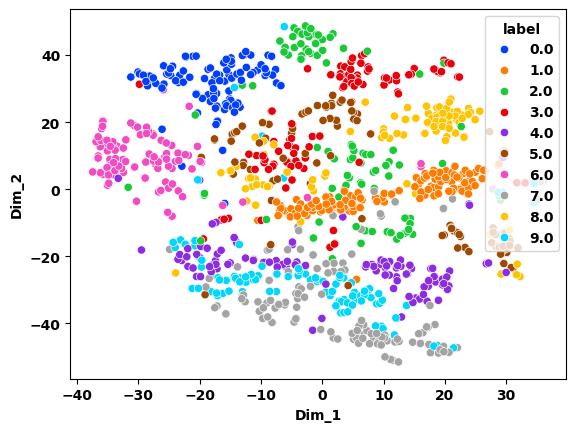

In [11]:
# Plotting the result of tsne

import seaborn as sn
import matplotlib.pyplot as plt
sn.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.show()

#**Well Done**